<h1 style="text-align:center;">Analysis of Video Game Sales</h1>

## Introduction
This report contains an analysis of sales for different video games over time. We strive to show how the industry of video games has evolved from the year 1971 to 2024. The data we have used to carry out the research has various fields that enable us to conduct various investigations and get findings. The data has different game titles whose sales information is broken down to different regions and the ultimate total sales. The different attributes of each game is also given in the data, that is, the critic score of the game, the genre of the game, the console to which the game is made and more. These attributes are probable factors that affect how successful a game is, for instance the higher the critic score the higher the sales are expected to be. We are going to do a step-by-step analysis to ascertain or dispute the assumptions.

In [1]:
'''We import the necessary libraries to be used in the analysis'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# this sets to display all the columns in our data
pd.set_option('display.max_columns',500)

In [3]:
# We import our data as a DataFrame and assign it to a variable named df.
df = pd.read_csv('vgchartz-2024.csv')
df.head() # displays the first five rows of our data

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
print(f'We have a data that contains {df.shape[0]} rows and {df.shape[1]} columns')

We have a data that contains 64016 rows and 14 columns


In [5]:
# To confirm the content of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


From the information provided above under the Non-Null count column, it can be seen that a number of columns have null entries. It is not practical to use null values in our research. Therefore, for this analysis we dropped the null values respective for the different analysis in order to improve on the accuracy of the results.

In [6]:
# A description of what all the columns contain
df2 = pd.read_csv('vg_data_dictionary.csv')
df2

,Field,Description
0,img,URL slug for the box art at vgchartz.com
1,title,Game title
2,console,Console the game was released for
3,genre,Genre of the game
4,publisher,Publisher of the game
5,developer,Developer of the game
6,critic_score,Metacritic score (out of 10)
7,total_sales,Global sales of copies in millions
8,na_sales,North American sales of copies in millions
9,jp_sales,Japanese sales of copies in millions


## 1. Top-Selling Titles Worldwide 
The first analysis was to get top-selling video games and identify factors that led to their outstanding performance.

In [7]:
# drop the null values in the dataset
df_clean = df.dropna()
df_clean

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,/games/boxart/full_2874583AmericaFrontccc.jpg,RPG Maker: Fes,3DS,Role-Playing,NIS America,Kadokawa Games,7.0,0.07,0.03,0.02,0.00,0.00,2017-06-27,2018-04-22
11920,/games/boxart/full_4489495AmericaFrontccc.jpg,BlazBlue: Cross Tag Battle,NS,Fighting,Arc System Works,Arc System Works,8.0,0.07,0.04,0.01,0.01,0.01,2018-06-05,2018-06-06
12216,/games/boxart/full_5524695AmericaFrontccc.jpg,Disgaea 1 Complete,NS,Role-Playing,NIS America,Nippon Ichi Software,8.0,0.06,0.03,0.01,0.01,0.00,2018-10-09,2019-02-19
13198,/games/boxart/full_5198003AmericaFrontccc.jpg,GrimGrimoire,PS2,Strategy,NIS America,Vanillaware,7.7,0.05,0.01,0.03,0.01,0.00,2007-06-26,2019-01-10


In [8]:
# creating a dataframe of each game ranked from highest to lowest on total sales
top_games = df_clean.groupby(['title'])['total_sales'].sum().sort_values(ascending = False)
top_20_games = pd.DataFrame(top_games[:20]) # top 20 games
top_20_games

,total_sales
title,
Grand Theft Auto V,28.11
Call of Duty: Black Ops II,27.66
Call of Duty: Ghosts,25.06
Call of Duty: Advanced Warfare,21.36
The Elder Scrolls V: Skyrim,16.52
Call of Duty: Black Ops 3,15.09
Red Dead Redemption 2,13.94
Fallout 4,13.51
Call of Duty: WWII,13.40


The **top_20_games** DataFrame above contains the top 20 games with highest sales. A list of all games with their total sales is in the **top_games** DataFrame. The game with the highest sales is **Grand Theft Auto** with $ 28.11 million total sales. **Call of Duty** and **FIFA** games are featured multiple times in the top games.
The bar graph below shows how each of the top 20 games performed.

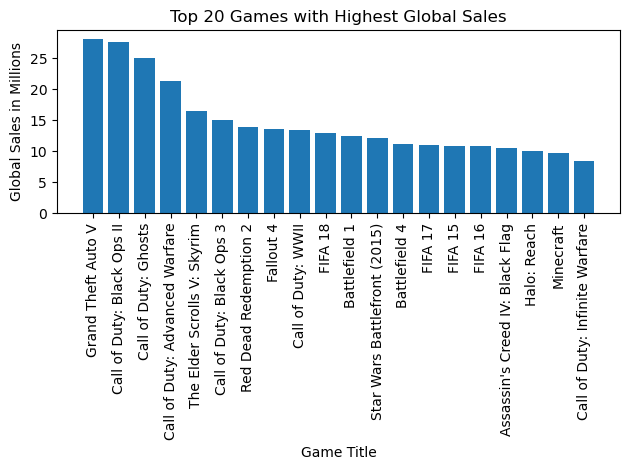

In [9]:
# a plot of the top games
fig, ax  = plt.subplots()
ax.bar(top_20_games.index,top_20_games['total_sales'])
ax.set_ylabel('Global Sales in Millions')
ax.set_xlabel('Game Title')
ax.set_title('Top 20 Games with Highest Global Sales')
plt.xticks(rotation = 90)
plt.tight_layout();

After establishing the top-selling games it is prudent to investigate if any or all of the various game attributes have an impact on the sales. First we investigate the critic score.

In [10]:
# Get the critc scores of the top 20 games
highest_sales = df_clean[df_clean['title'].isin(top_20_games.index)]
highest_score = pd.DataFrame(highest_sales.groupby(['title'])['critic_score'].mean())
highest_score

,critic_score
title,
Assassin's Creed IV: Black Flag,8.500000
Battlefield 1,9.200000
Battlefield 4,8.566667
Call of Duty: Advanced Warfare,8.750000
Call of Duty: Black Ops 3,8.100000
Call of Duty: Black Ops II,8.200000
Call of Duty: Ghosts,7.675000
Call of Duty: Infinite Warfare,7.900000
Call of Duty: WWII,8.100000


In [11]:
# get the critic scores of the games outside top 20 games
other_sales = df_clean[~df_clean['title'].isin(top_20_games.index)]
lowest_score = pd.DataFrame(other_sales.groupby(['title'])['critic_score'].mean())
lowest_score.head()

,critic_score
title,
2014 FIFA World Cup Brazil,7.6
7th Dragon III Code: VFD,7.5
Animal Crossing: Amiibo Festival,4.8
Ape Escape,9.3
Ape Escape 2,8.0


From the results and as visualized in the pie chart below, the 
top 20 games have a higher average critic score of 8.41 compared to
the other games that have an average critic score of 7.52.
This confirms that the critic score affects the sales of a game. The higher the critic score the more the sales


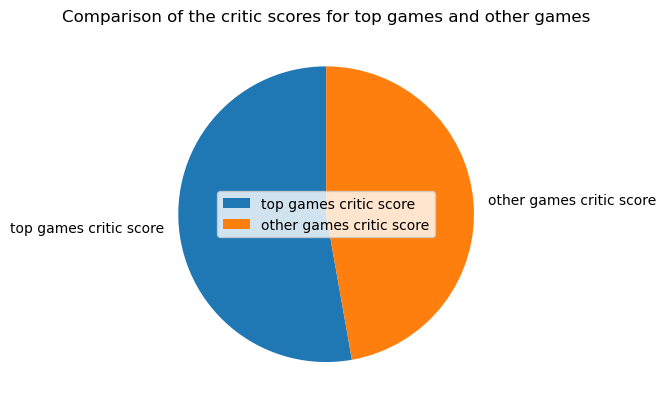

In [12]:
# plot the difference in critic scores
scores = [highest_score.mean().iloc[0],lowest_score.mean().iloc[0]]
my_labels = ['top games critic score','other games critic score']

fig, ax = plt.subplots()
ax.pie(scores,labels = my_labels,startangle = 90)
ax.legend()
ax.set_title('Comparison of the critic scores for top games and other games');

print(f'''From the results and as visualized in the pie chart below, the 
top 20 games have a higher average critic score of {round(highest_score.mean().iloc[0],2)} compared to
the other games that have an average critic score of {round(lowest_score.mean().iloc[0],2)}.
This confirms that the critic score affects the sales of a game. The higher the critic score the more the sales''')

After establishing that the critic score affects the sales. We head on to investigate the effect of genre on the sales.

In [13]:
genre = highest_sales[['title','genre']].drop_duplicates()
genre

,title,genre
1,Grand Theft Auto V,Action
4,Call of Duty: Black Ops 3,Shooter
7,Red Dead Redemption 2,Action-Adventure
8,Call of Duty: Black Ops II,Shooter
11,Call of Duty: WWII,Shooter
15,FIFA 18,Sports
17,FIFA 17,Sports
20,Call of Duty: Ghosts,Shooter
22,Halo: Reach,Shooter
27,The Elder Scrolls V: Skyrim,Role-Playing


In [14]:
top_genres = genre['genre'].value_counts()
top_genres

genre
Shooter             10
Sports               4
Action-Adventure     2
Role-Playing         2
Action               1
Misc                 1
Sandbox              1
Name: count, dtype: int64

The most selling genre is shooter, in the top 20 games, half of the games are of the shooter genre.

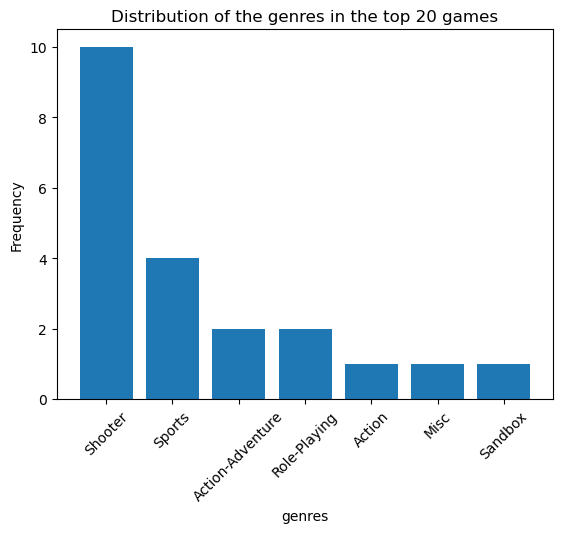

In [15]:
#plot of the top genres
fig,ax = plt.subplots()
ax.bar(top_genres.index,top_genres)
ax.set_xlabel('genres')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the genres in the top 20 games')
plt.xticks(rotation = 45);

In [16]:
console = highest_sales[['title','console']].drop_duplicates()
console

,title,console
1,Grand Theft Auto V,PS4
4,Call of Duty: Black Ops 3,PS4
7,Red Dead Redemption 2,PS4
8,Call of Duty: Black Ops II,X360
9,Call of Duty: Black Ops II,PS3
11,Call of Duty: WWII,PS4
15,FIFA 18,PS4
17,FIFA 17,PS4
20,Call of Duty: Ghosts,X360
21,Call of Duty: Ghosts,PS3


In [17]:
top_console = console['console'].value_counts()
top_console

console
PS4     17
PS3      8
X360     7
XOne     5
NS       3
WiiU     2
Name: count, dtype: int64

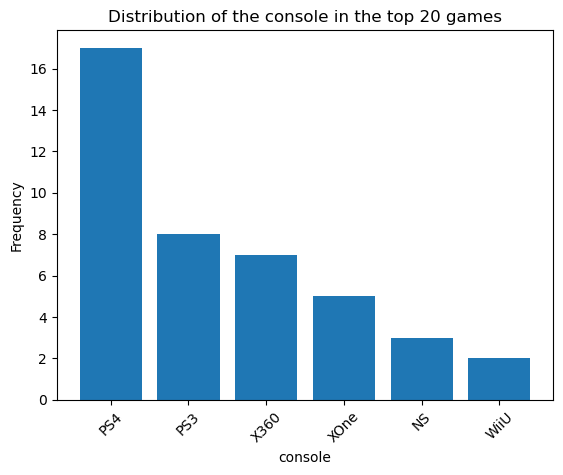

In [18]:
#plot of the top consoles
fig,ax = plt.subplots()
ax.bar(top_console.index,top_console)
ax.set_xlabel('console')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the console in the top 20 games')
plt.xticks(rotation = 45);

The top console is PS4 indicating that the console affects the sales.

**In conclusion** the critic score, the genre and the console for which the game is made for affects the sales of a game. This is in line with the assumptions that the more a game is rated highely the more it will sell. A genre that is most liked will definately sell more and finally the console that is most owned and most liked will have games made for them highly purchased.

## 2. Sales Trend Overtime
The second point of investigation is to analyze how the video games sales have improved over time.

In [19]:
# create a DataFrame with the total sales per year
sales_by_year = df[['total_sales','release_date']].dropna()
sales_by_year.loc[:,'release_date'] = sales_by_year.loc[:,'release_date'].str[:4].astype('int')
sales_by_year.head()

,total_sales,release_date
0,20.32,2013
1,19.39,2014
2,16.15,2002
3,15.86,2013
4,15.09,2015


In [20]:
sales_trend = sales_by_year.groupby(['release_date'])['total_sales'].sum()

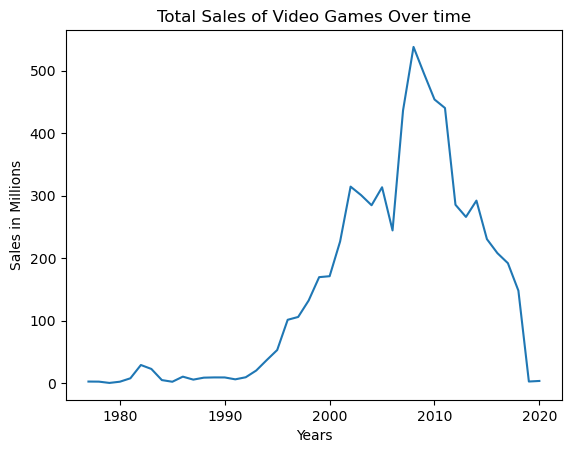

In [21]:
fig, ax  = plt.subplots()
ax.plot(sales_trend.index,sales_trend)
ax.set_title('Total Sales of Video Games Over time')
ax.set_xlabel('Years')
ax.set_ylabel('Sales in Millions');

The line graph above shows the trend of the sales of the games over time from the 70s to 2024. There was a steady rise in the sale of the games from the 1970s and it peaked at around 2010. But it has since experienced steady decline since then, hitting a low in 2020 during the pandemic.

## 3. Console Specialization in Genres
Here we investigate whether consoles specialize in a particular genre.

In [22]:
# A data frame of genres and consoles
genre_console = df[['genre','console']]
genre_console.head()

,genre,console
0,Action,PS3
1,Action,PS4
2,Action,PS2
3,Action,X360
4,Shooter,PS4


In [23]:
# different genres classified to each console
g_c = pd.crosstab(index = genre_console['console'], columns = genre_console['genre'])
g_c

genre,Action,Action-Adventure,Adventure,Board Game,Education,Fighting,MMO,Misc,Music,Party,Platform,Puzzle,Racing,Role-Playing,Sandbox,Shooter,Simulation,Sports,Strategy,Visual Novel
console,,,,,,,,,,,,,,,,,,,,
2600,302,0,3,0,0,3,0,21,0,0,17,19,19,4,0,68,4,39,2,0
3DO,12,0,43,0,0,13,0,88,0,0,7,13,10,10,0,37,23,35,14,0
3DS,198,34,63,0,1,18,1,382,11,8,76,78,22,125,0,20,75,49,26,5
5200,26,0,2,0,0,0,0,0,0,0,9,6,2,0,0,20,1,7,0,0
7800,21,0,0,0,0,3,0,0,0,0,6,3,3,0,0,9,2,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XOne,309,211,216,2,1,91,10,67,27,10,120,67,129,197,3,201,81,137,71,13
XS,63,121,94,1,0,18,4,5,5,5,35,17,36,75,0,65,37,16,20,3
ZXS,5,0,0,0,0,0,0,13,0,0,1,0,0,0,0,0,0,0,0,0


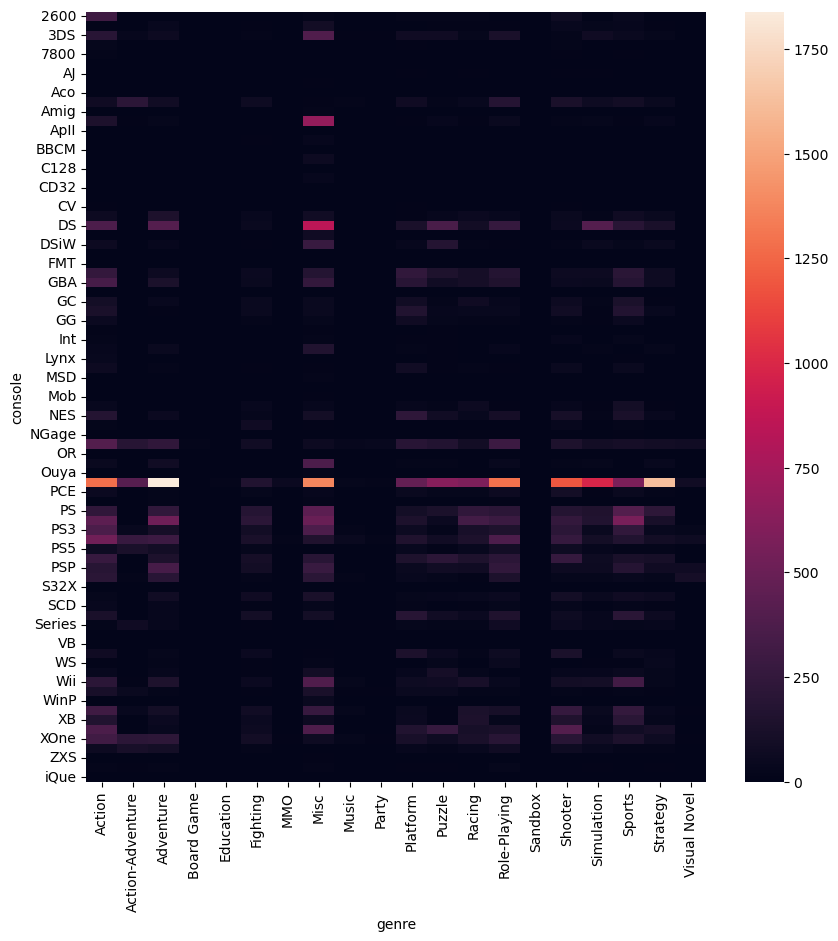

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(g_c);

The heatmap above indicates that very few consoles have specialized in a particular genre. PC is one console that is shown to majorly specialize in Action, Strategy and Misc genres. Most consoles however take all genres shown.

## 4. Regional Popularity and Flops
Lastly we look into the games performance regionally to investigate any variance.

In [25]:
popularity = df.groupby(['title']
                       )[['na_sales','jp_sales','pal_sales','other_sales','total_sales']].sum().sort_values(
                        by = 'total_sales',ascending = False)
popularity = popularity[popularity['total_sales']>0]
popularity.head()

,na_sales,jp_sales,pal_sales,other_sales,total_sales
title,,,,,
Grand Theft Auto V,26.19,1.66,28.14,8.32,64.29
Call of Duty: Black Ops,17.65,0.59,9.45,3.31,30.99
Call of Duty: Modern Warfare 3,15.57,0.62,11.26,3.26,30.71
Call of Duty: Black Ops II,14.12,0.72,11.08,3.67,29.59
Call of Duty: Ghosts,15.06,0.49,9.60,3.65,28.80


In [26]:
popularity['disparity'] = popularity[['na_sales','jp_sales','pal_sales','other_sales']].std(axis = 1)
popularity.head()

,na_sales,jp_sales,pal_sales,other_sales,total_sales,disparity
title,,,,,,
Grand Theft Auto V,26.19,1.66,28.14,8.32,64.29,13.112458
Call of Duty: Black Ops,17.65,0.59,9.45,3.31,30.99,7.569218
Call of Duty: Modern Warfare 3,15.57,0.62,11.26,3.26,30.71,6.938983
Call of Duty: Black Ops II,14.12,0.72,11.08,3.67,29.59,6.251295
Call of Duty: Ghosts,15.06,0.49,9.60,3.65,28.80,6.459262


In [27]:
title_variation = popularity[popularity['disparity']>3].sort_values(by = 'disparity', ascending = False)
title_variation

,na_sales,jp_sales,pal_sales,other_sales,total_sales,disparity
title,,,,,,
Grand Theft Auto V,26.19,1.66,28.14,8.32,64.29,13.112458
Call of Duty: Black Ops,17.65,0.59,9.45,3.31,30.99,7.569218
Call of Duty: Modern Warfare 3,15.57,0.62,11.26,3.26,30.71,6.938983
Call of Duty: Ghosts,15.06,0.49,9.60,3.65,28.80,6.459262
Call of Duty: Black Ops II,14.12,0.72,11.08,3.67,29.59,6.251295
Call of Duty: Modern Warfare 2,13.54,0.46,8.08,2.95,25.02,5.799623
Call of Duty: Black Ops 3,12.82,0.50,9.76,3.63,26.72,5.617855
FIFA 15,3.19,0.15,12.45,2.21,18.03,5.449318
FIFA 14,2.88,0.21,12.14,2.09,17.31,5.325743


The table above shows the games with the most variation with Grand Theft Auto V on top of the list with a standard deviation of $ 13 million. The sales in Japan and other parts of the world apart from North America, Europe and Africa, were low. This can be attributed to population differences. This is the case for most of the other differences. The effect of availability factor or preferences is not significant on the sales. Most of the games had a standard deviation below 2 million showing that most did not experience disparities across regions.

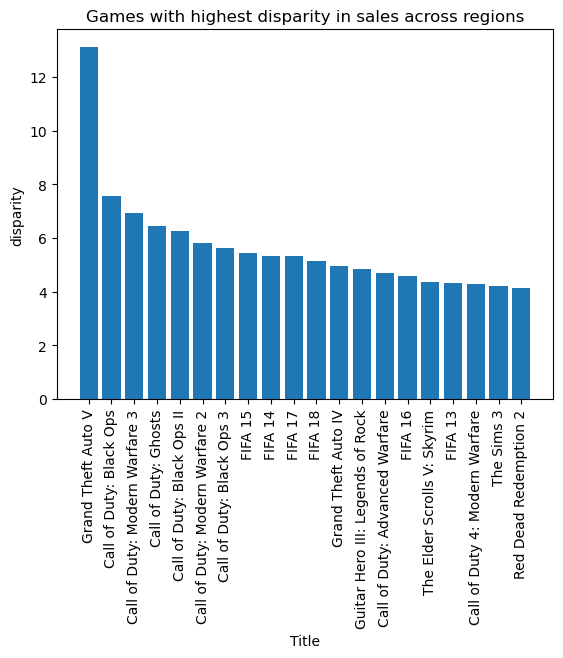

In [28]:
fig,ax = plt.subplots()
ax.bar(title_variation.index[:20],title_variation['disparity'][:20])
ax.set_title('Games with highest disparity in sales across regions')
ax.set_xlabel('Title')
ax.set_ylabel('disparity')
plt.xticks(rotation = 90);

In [29]:
popularity1 = df.groupby(['console']
                       )[['na_sales','jp_sales','pal_sales','other_sales','total_sales']].sum().sort_values(
                        by = 'total_sales',ascending = False)
popularity1 = popularity1[popularity1['total_sales']>0]
popularity1.head()

,na_sales,jp_sales,pal_sales,other_sales,total_sales
console,,,,,
PS2,489.96,87.63,296.37,153.94,1027.76
X360,528.40,10.16,244.50,76.74,859.79
PS3,351.10,67.68,302.22,118.93,839.70
PS,263.26,88.32,163.73,31.10,546.25
PS4,192.18,30.69,233.40,83.55,539.92


In [30]:
popularity1['disparity'] = popularity1[['na_sales','jp_sales','pal_sales','other_sales']].std(axis = 1)
popularity1.head()

,na_sales,jp_sales,pal_sales,other_sales,total_sales,disparity
console,,,,,,
PS2,489.96,87.63,296.37,153.94,1027.76,178.071069
X360,528.40,10.16,244.50,76.74,859.79,231.059194
PS3,351.10,67.68,302.22,118.93,839.70,137.795095
PS,263.26,88.32,163.73,31.10,546.25,100.399205
PS4,192.18,30.69,233.40,83.55,539.92,93.949956


In [31]:
console_variation = popularity1[popularity1['disparity']>3].sort_values(by = 'disparity', ascending = False)
console_variation

,na_sales,jp_sales,pal_sales,other_sales,total_sales,disparity
console,,,,,,
X360,528.40,10.16,244.50,76.74,859.79,231.059194
PS2,489.96,87.63,296.37,153.94,1027.76,178.071069
PS3,351.10,67.68,302.22,118.93,839.70,137.795095
Wii,285.42,16.84,117.72,38.85,459.44,121.770605
DS,264.84,64.20,94.33,33.88,458.17,103.341631
PS,263.26,88.32,163.73,31.10,546.25,100.399205
PS4,192.18,30.69,233.40,83.55,539.92,93.949956
XB,166.88,0.83,55.62,8.17,232.05,76.620045
XOne,164.53,0.38,79.44,24.53,268.96,72.820753


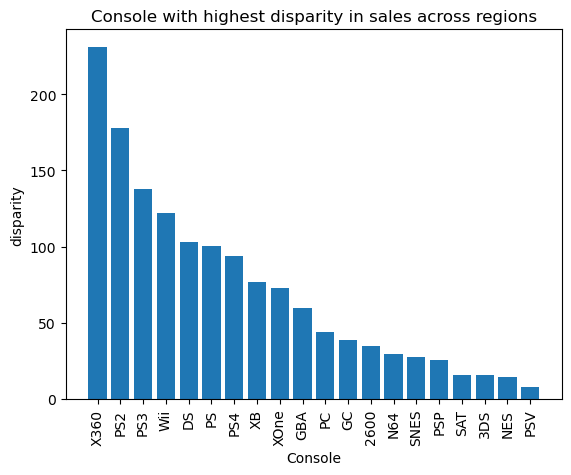

In [32]:
fig,ax = plt.subplots()
ax.bar(console_variation.index[:20],console_variation['disparity'][:20])
ax.set_title('Console with highest disparity in sales across regions')
ax.set_xlabel('Console')
ax.set_ylabel('disparity')
plt.xticks(rotation = 90);

Similar to the games, the consoles sales disparity is attributed to the population density differences. X360 has the highest disparity.

In [33]:
popularity2 = df.groupby(['genre']
                       )[['na_sales','jp_sales','pal_sales','other_sales','total_sales']].sum().sort_values(
                        by = 'total_sales',ascending = False)
popularity2 = popularity2[popularity2['total_sales']>0]
popularity2.head()

,na_sales,jp_sales,pal_sales,other_sales,total_sales
genre,,,,,
Sports,607.47,109.27,341.92,128.19,1187.51
Action,589.69,80.30,342.52,112.41,1125.89
Shooter,528.27,33.99,324.74,108.43,995.50
Misc,295.66,56.24,146.71,58.52,557.79
Racing,269.72,20.23,179.14,56.44,525.75


In [34]:
popularity2['disparity'] = popularity2[['na_sales','jp_sales','pal_sales','other_sales']].std(axis = 1)
popularity2.head()

,na_sales,jp_sales,pal_sales,other_sales,total_sales,disparity
genre,,,,,,
Sports,607.47,109.27,341.92,128.19,1187.51,232.485459
Action,589.69,80.30,342.52,112.41,1125.89,236.486147
Shooter,528.27,33.99,324.74,108.43,995.50,223.396079
Misc,295.66,56.24,146.71,58.52,557.79,112.439211
Racing,269.72,20.23,179.14,56.44,525.75,114.585193


In [35]:
genre_variation = popularity2[popularity2['disparity']>3].sort_values(by = 'disparity', ascending = False)
genre_variation

,na_sales,jp_sales,pal_sales,other_sales,total_sales,disparity
genre,,,,,,
Action,589.69,80.30,342.52,112.41,1125.89,236.486147
Sports,607.47,109.27,341.92,128.19,1187.51,232.485459
Shooter,528.27,33.99,324.74,108.43,995.50,223.396079
Racing,269.72,20.23,179.14,56.44,525.75,114.585193
Misc,295.66,56.24,146.71,58.52,557.79,112.439211
Platform,187.96,31.08,99.39,30.38,349.15,74.563486
Fighting,173.96,58.61,79.84,28.65,341.13,62.748123
Role-Playing,171.67,130.56,91.02,33.75,426.80,58.759270
Simulation,152.84,35.98,86.86,24.34,300.65,58.562562


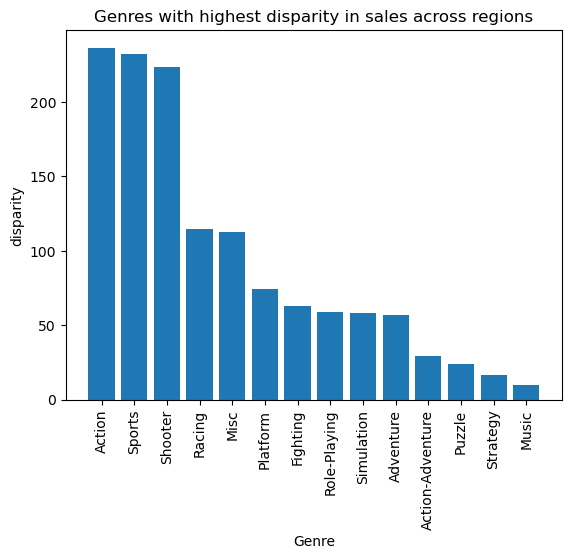

In [36]:
fig,ax = plt.subplots()
ax.bar(genre_variation.index[:20],genre_variation['disparity'][:20])
ax.set_title('Genres with highest disparity in sales across regions')
ax.set_xlabel('Genre')
ax.set_ylabel('disparity')
plt.xticks(rotation = 90);

Action genre has the highest disparity. Most sales are in North America as that is where most of the video games are produced. Otherwise,the population differences mainly leads to the disparity in sales.

## Conclusion
The analysis clarifies most of the general assumptions and we discovered more findings in the course of the analysis.